In [2]:
import numpy as np
from sklearn.datasets import load_digits

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x, y = load_digits(return_X_y=True)
x.shape, y.shape

((1797, 64), (1797,))

In [4]:
index = len(x) // 2
train_x, test_x = x[:index], x[index:]
train_y, test_y = y[:index], y[index:]

데이터 좌우로 붙이기

In [5]:
def concat(x0, x1):
    res1 = np.concatenate((x0.reshape((8,8)), x1.reshape((8,8))), axis=1)
    return np.reshape(res1, [-1])

In [12]:
x_data = list()
y_data = list()

In [13]:
for x0, y0 in zip(train_x, train_y):
    for x1, y1 in zip(train_x, train_y):
        res = concat(x0, x1)
        x_data.append(res)
        y_data.append([y0, y1])
x_data = np.array(x_data)
y_data = np.array(y_data)
x_data.shape, y_data.shape

((806404, 128), (806404, 2))

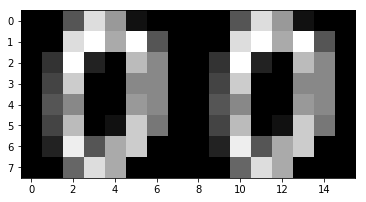

In [14]:
plt.imshow(x_data[0].reshape((8,16)), cmap='gray')

In [15]:
x_test_data = list()
y_test_data = list()

In [16]:
for x0, y0 in zip(test_x, test_y):
    for x1, y1 in zip(test_x, test_y):
        res = concat(x0, x1)
        x_test_data.append(res)
        y_test_data.append([y0, y1])
x_test_data = np.array(x_test_data)
y_test_data = np.array(y_test_data)
x_test_data.shape, y_test_data.shape

((808201, 128), (808201, 2))

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(280,280,128), max_iter=1000, random_state=2020)
model = MultiOutputClassifier(mlp).fit(x_data, y_data)
# model.predict(x_data), model.score(x_data, y_data)

In [41]:
model.predict(x_test_data), model.score(x_test_data, y_test_data)

(array([[8, 8],
        [8, 8],
        [8, 4],
        ..., 
        [8, 8],
        [8, 9],
        [8, 8]]), 0.8888976875801935)

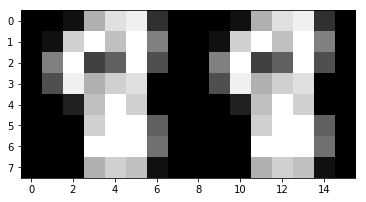

In [21]:
plt.imshow(x_test_data[0].reshape((8,16)), cmap='gray')

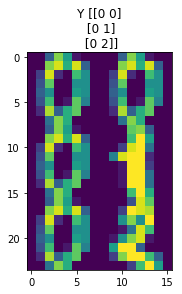

In [25]:
plt.title('Y ' + str(y_data[:3]))
plt.imshow(x_data[:3].reshape((-1,16)))